In [0]:
pip install matplotlib

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
dbutils.fs.ls(f"/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709140579000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706717904000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1714601756000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1714601504000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, mod

# CHECKING IF FILES EXISTS

In [0]:
# Fuction to check if file exists in the file system

clinical_tiral_file = "clinicaltrial_2023" # Can also be reassigned to "clinicaltrial_2020" and "clinicaltrial_2021" for code reusability
pharma_file = "pharma"

def check_zip_file(_file):
    try:
        db = dbutils.fs.ls(f"/FileStore/tables/{_file}.zip")
    except Exception:
        print(f'File {_file} does not exist')

check_zip_file(clinical_tiral_file)
check_zip_file(pharma_file)

File clinicaltrial_2023 does not exist
File pharma does not exist


# COPYING TO LOCAL FILE SYSTEM

In [0]:
# Copy the files to the local file system if the files exists

def copy_file_to_local(_file):
    try:
        dbutils.fs.cp(f"/FileStore/tables/{_file}.zip", "file:/tmp/")
        dbutils.fs.ls(f"/FileStore/tables/{_file}.zip")
    except Exception:
        pass

copy_file_to_local(clinical_tiral_file)
copy_file_to_local(pharma_file)

In [0]:
# Creating variables in the os environment for system 

import os

os.environ['clinical_tiral_file'] = clinical_tiral_file
os.environ['pharma_file'] = pharma_file

# UNZIPPING FILES IN LOCAL FILE SYSTEM USING LINUX COMMANDS

In [0]:
%sh
unzip -d /tmp /tmp/$clinical_tiral_file.zip
unzip -d /tmp /tmp/$pharma_file.zip

unzip:  cannot find or open /tmp/clinicaltrial_2023.zip, /tmp/clinicaltrial_2023.zip.zip or /tmp/clinicaltrial_2023.zip.ZIP.
unzip:  cannot find or open /tmp/pharma.zip, /tmp/pharma.zip.zip or /tmp/pharma.zip.ZIP.


# MOVING UNZIPPED FILES BACK TO DBFS

In [0]:
# Moving unzipped files back to the Databricks file system

def move_file_to_dbfs(_file):
    try:
        dbutils.fs.mv(f"file:/tmp/{_file}.csv", f"/FileStore/tables/{_file}.csv", )
    except Exception:
        pass

move_file_to_dbfs(clinical_tiral_file)
move_file_to_dbfs(pharma_file)

# REMOVING ZIPFILES AFTER EXTRACTIONS

In [0]:
# Removing the zip files from the directory after it has served its purpose

def clean_directory(_file):
    try:
        dbutils.fs.rm(f"/FileStore/tables/{_file}.zip")
    except Exception:
        pass

clean_directory(clinical_tiral_file)
clean_directory(pharma_file)

In [0]:
dbutils.fs.head(f"/FileStore/tables/{clinical_tiral_file}.csv")

[Truncated to first 65536 bytes]
Out[8]: '"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-

In [0]:
dbutils.fs.head(f"/FileStore/tables/{pharma_file}.csv")

[Truncated to first 65536 bytes]
Out[9]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to ind

# CREATING AND CLEANING RDD

In [0]:
# Function to create

def create_rdd(_file):
    RDD = sc.textFile(f"/FileStore/tables/{_file}.csv")
    return RDD

CT_RDD_MAIN = create_rdd(clinical_tiral_file) # Calling the function for creating rdd with the clinical trial file as the parameter
PHARMA_RDD_MAIN = create_rdd(pharma_file)  # Calling the function for creating rdd with the pharma file as the parameter

CT_RDD_MAIN.take(10)

Out[10]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
delimiter_selector = {
    "clinicaltrial_2023": "\t",
    "clinicaltrial_2021": "|",
    "clinicaltrial_2020": "|",
    "pharma": ","
}

def clean_rdd(RDD, _file):
    rdd = RDD.map(lambda x: x.rstrip(",").strip('"'))
    rdd = rdd.map(lambda x: x.split(delimiter_selector[_file]))
    head = rdd.first()
    rdd = rdd.map(lambda row: row + [" " for i in range(len(head) - len(row))])
    return rdd

CT_RDD_CLEAN = clean_rdd(CT_RDD_MAIN, clinical_tiral_file)  # Calling the function for cleaning rdd with the clinical trial file as the parameter
PHARMA_RDD_CLEAN = clean_rdd(PHARMA_RDD_MAIN, pharma_file) # Calling the function for cleaning rdd with the pharma file as the parameter

CT_RDD_CLEAN.take(5)

Out[11]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovas

# QUESTION 1

In [0]:
# QUESTION 1 DISTINCT NUMBER OF RECORDS IN THE DATASET

header = CT_RDD_MAIN.first() # Getting the first row of the dataset which is header

rdd_except_header = CT_RDD_MAIN.filter(lambda row: row != header) # Filtering the data set to remove the header row

distinct_records = rdd_except_header.distinct().count() # Getting the number of disctinct records 
distinct_records # Displaying result

Out[12]: 483422

# QUESTION 2

In [0]:
# QUESTION TWO: ALL TYPES OF TRIALS IN THE TYPE COLUMN

typ_inx = CT_RDD_CLEAN.first().index('Type') # Finding the index of the "Type" Column

typeColumn = CT_RDD_CLEAN.map(lambda x: (x[typ_inx], 1)) # Creating a new rdd from the "Type" column using its index

typeColumn = typeColumn.filter(lambda row: row[0] not in ("Type", " ", "")) # Removing the column header and empty columns

typeColumnFrequency = typeColumn.reduceByKey(lambda a,b: a + b) # Reducing by key to get frequency of each Type

typeColumnFrequencySorted = typeColumnFrequency.sortBy(lambda x: x[1], ascending=False) # Sorting accoringing to frequency of each type (x[1])

typeColumnFrequencySorted.collect() # Viewing results

Out[13]: [('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928)]

# QUESTION 3

In [0]:
# QUESTION 3: ALL CONDITIONS

conditions_delimeter = {       # Creating a dictionary for delimiter mapping using the file names for each year
    "clinicaltrial_2023": "|",
    "clinicaltrial_2021": ",",
    "clinicaltrial_2020": ",",
}
con_col_indx = CT_RDD_CLEAN.first().index('Conditions') #Getting the index of the Conditions column

flatMapConditionsCol = CT_RDD_CLEAN.flatMap(lambda x: x[con_col_indx].split(conditions_delimeter[clinical_tiral_file])) # Flatmaping to destructure 

filteredConditionsCol = flatMapConditionsCol.filter(lambda row: row not in ('Conditions', "", " ")) # Filtering to remove header and empty rows

valueKeyPairConditionsCol = filteredConditionsCol.map(lambda x: (x, 1)) # Creating a key-value pair tuple for each item in the column

valueSumsConditionCol = valueKeyPairConditionsCol.reduceByKey(lambda a,b: a + b) # Getting the individual sum of distinct data by reducing by key

sortedConditionsCol = valueSumsConditionCol.sortBy(lambda x: x[1], ascending=False) #Sorting our rdd by the value of the sums

sortedConditionsCol.take(5) # Viewing results

Out[14]: [('Healthy', 9731),
 ('Breast Cancer', 7502),
 ('Obesity', 6549),
 ('Stroke', 4071),
 ('Hypertension', 4020)]

# QUESTION 4

In [0]:
# QUESTION 4,  TOP 10 NON - PHARMA COMPANIES
ct_sponsor_col_index = CT_RDD_CLEAN.first().index('Sponsor') # Finding the index of the Sponsor column

parent_pharm_comp = PHARMA_RDD_CLEAN.map(lambda x: x[1].replace('"', '')) # Extracting the parent pharma company column and also cleaning the data

sponsorColumn = CT_RDD_CLEAN.map(lambda x: x[ct_sponsor_col_index]) # Extracting the Sponsor column from the main RDD

sponsorColumn = sponsorColumn.filter(lambda row: row != 'Sponsor') # Removing the Header row from the RDD

sponsorColumnFiltered = sponsorColumn.subtract(parent_pharm_comp) # Finding the difference between the parent pharma company column and Sponsor column

keyValuePairSponsorColumn = sponsorColumnFiltered.map(lambda x: (x, 1)) # Creating a key value pair for the reducing function

valueSumSponsorColumn = keyValuePairSponsorColumn.reduceByKey(lambda x, y: x + y) # Reducing by Key to get sum of distinct data

sortedSponsorColumn = valueSumSponsorColumn.sortBy(lambda x: x[1], ascending=False) # Sorting rdd by sum in decending order

sortedSponsorColumn.take(10) # Veiwing top 10 results

Out[15]: [('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

# QUESTION 5

In [0]:
#number of completed studies for each month in 2023
status_column_index = CT_RDD_CLEAN.first().index('Status') # Getting index of "Status" column
completion_column_index = CT_RDD_CLEAN.first().index('Completion') # Getting index of "Completion" column

dateDelimeter = {                # Creating dictionary for selection of delimeter using file names and keys
    "clinicaltrial_2023": "-",
    "clinicaltrial_2021": " ",
    "clinicaltrial_2020": " ",
}

orderedMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] # Defining an ordered list of months

completedStudies = CT_RDD_CLEAN.filter(lambda row: row[status_column_index] in ("COMPLETED", "Completed")) # Filtering rows with "Status" column as completed

completionColumn = completedStudies.map(lambda row: row[completion_column_index]).filter(lambda x: x not in ("", " ")) # Extracting "Completion" column and filtering the empty rows

extractedDates = completionColumn.map(lambda x: x.split(dateDelimeter[clinical_tiral_file])) # Spliting the date data by delimeter from the dateDelimeter dictionary

extractedDates = extractedDates.map(lambda x: (x[1], orderedMonths.index(x[0]) + 1) if x[1].startswith('20') else (x[0], int(x[1]))) #Creating Key value pairs with specific conditions

extractedDates = extractedDates.filter(lambda x: x[0] == clinical_tiral_file.split("_")[1]) # Filtering dates by year. eg 2023, 2021, 2020

extractedDates = extractedDates.map(lambda x: (x[1], 1)).reduceByKey(lambda a, b: a + b) # Getting sums of distinct data using the reducing function

extractedDates = extractedDates.sortBy(lambda x: x[0]).map(lambda x: (orderedMonths[x[0] - 1], x[1])) # Sorting by months an

extractedDates.collect() # Displaying results

Out[16]: [('Jan', 1494),
 ('Feb', 1272),
 ('Mar', 1552),
 ('Apr', 1324),
 ('May', 1415),
 ('Jun', 1619),
 ('Jul', 1360),
 ('Aug', 1230),
 ('Sep', 1152),
 ('Oct', 1058),
 ('Nov', 909),
 ('Dec', 1082)]

# QUESTION 5 VISUALIZATION

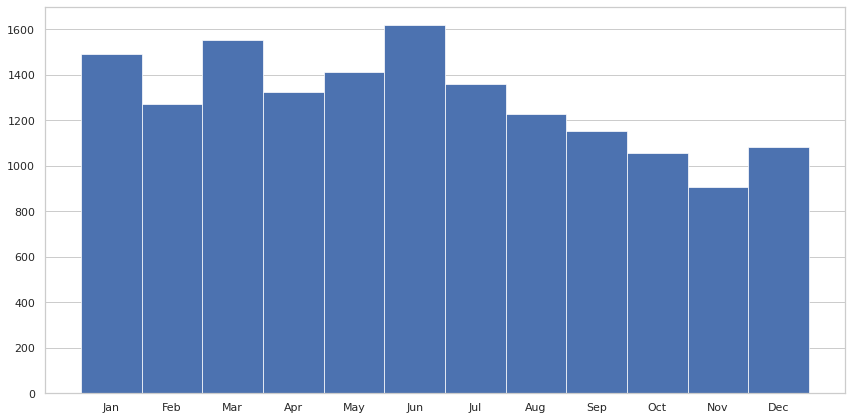

In [0]:
import matplotlib.pyplot as plt # Importing pyplot module in the matplotlib library
import seaborn as sns

x = extractedDates.map(lambda x: x[0]).collect() # Extracting the months column for the x axis
y = extractedDates.map(lambda x: x[1]).collect() # Extracting the frequency column for the y axis

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6)) # Setting the dimensions of the graph frame

sns.barplot(x=x, y=y, palette='viridis')

plt.bar(x, y, width=1, edgecolor="white", linewidth=0.7) # Passing the x and y axis to the bar method in the pyplot object 
plt.tight_layout()
plt.show() # Displaying the graph

# FURTHER ANALYSIS RDD

In [0]:
# Further analysis 1: Find the 10 most common sponsors that are pharmaceutical companies, along with the number of clinical trials they have sponsored
ct_sponsor_col_index = CT_RDD_CLEAN.first().index('Sponsor') # Finding the index of the Sponsor column

parent_pharm_comp = PHARMA_RDD_CLEAN.map(lambda x: x[1].replace('"', '')) # Extracting the parent pharma company column and also cleaning the data

sponsorColumn = CT_RDD_CLEAN.map(lambda x: x[ct_sponsor_col_index]) # Extracting the Sponsor column from the main RDD

sponsorColumn = sponsorColumn.filter(lambda row: row != 'Sponsor') # Removing the Header row from the RDD

sponsorColumnFiltered = sponsorColumn.subtract(parent_pharm_comp) # Finding the difference between the parent pharma company column and Sponsor column

sponsorColumnRefiltered = sponsorColumn.subtract(sponsorColumnFiltered) # Finding difference between the Sponsor colum and the non-pharma Sponsor column, creating a column of only pharma Sponsor companies

keyValuePairSponsorColumn = sponsorColumnRefiltered.map(lambda x: (x, 1)) # Creating a key value pair for the reducing function

valueSumSponsorColumn = keyValuePairSponsorColumn.reduceByKey(lambda x, y: x + y) # Reducing by Key to get sum of distinct data

sortedSponsorColumn = valueSumSponsorColumn.sortBy(lambda x: x[1], ascending=False) # Sorting rdd by sum in decending order

sortedSponsorColumn.take(10) # Veiwing top 10 results

Out[18]: [('GlaxoSmithKline', 3482),
 ('Pfizer', 3045),
 ('AstraZeneca', 3024),
 ('Boehringer Ingelheim', 2146),
 ('Sanofi', 1404),
 ('Bristol-Myers Squibb', 1383),
 ('Amgen', 851),
 ('AbbVie', 728),
 ('Novartis', 697),
 ('Gilead Sciences', 625)]

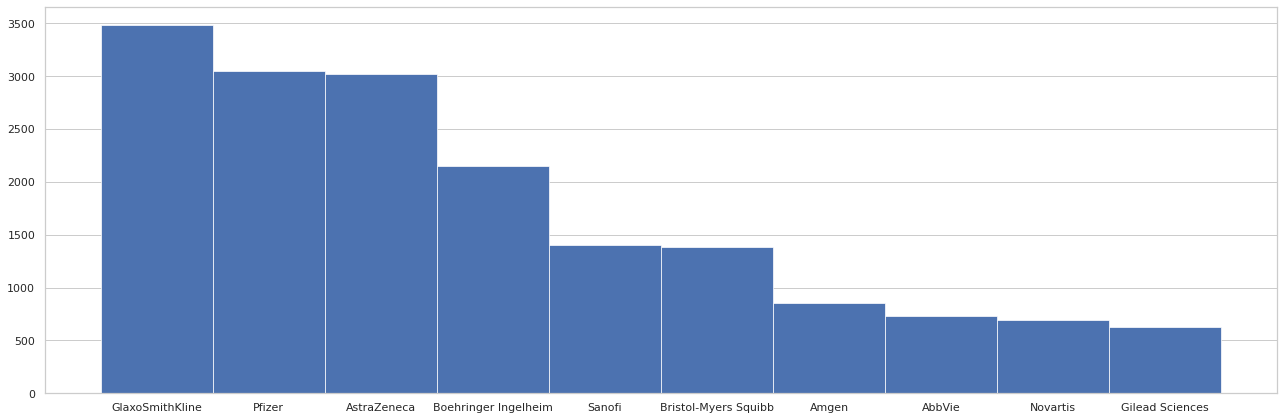

In [0]:
# VISUALIZATION FOR FURTHER ANALYSIS 1
x = sortedSponsorColumn.map(lambda x: x[0]).collect()[:10]
y = sortedSponsorColumn.map(lambda x: x[1]).collect()[:10]

sns.set(style='whitegrid')

plt.figure(figsize=(18, 6)) # Setting the dimensions of the graph frame

sns.barplot(x=x, y=y, palette='viridis')

plt.bar(x, y, width=1, edgecolor="white", linewidth=0.7) # Passing the x and y axis to the bar method in the pyplot object 
plt.tight_layout()
plt.show() # Displaying the graph